We start by importing all necessary Python libraries for scraping the NCEI weather data from Wikimedia and visualizing this data.

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from helpers import *

The first city we pull weather data for is Boston. We input a string containing a URL to the dataset, then use our helper functions to pull the data. We then drop data columns that are unnecessary for our visualization.

In [8]:
#Starting with plotting Boston data.

boston_wikiurl = "https://commons.wikimedia.org/wiki/Data:Ncei.noaa.gov/weather/Boston.tab"
boston_data = get_dataframe(boston_wikiurl)

# drop the unwanted columns
boston_data.drop(["precip", "precipDays"], axis=1, inplace = True, level=0)
boston_data.drop(range(226), axis = 0, inplace = True)
boston_data.reset_index(drop=True, inplace=True)

# data.to_csv('boston_weather.csv', index=False)

We then convert the date values to fractional years. By converting these values, we ensure that the data will be properly spaced on the graph, rather than being clustered around each year value.

In [9]:
dates_series = pd.Series(boston_data.date.values.flatten())

boston_data['date'] = convert_year(dates_series.str.split('-'))
#print(type(dates_series.str.split('-')))

Using plot_double_scatter, we plot two values from the table over time, the average high temperature and snowfall for each month. We pass all the variables into the function to create the graph. The resulting graph is shown below, with average high temp graphed in red and snowfall graphed in blue. A linear trendline is included for average high temperature, showing a general increase.

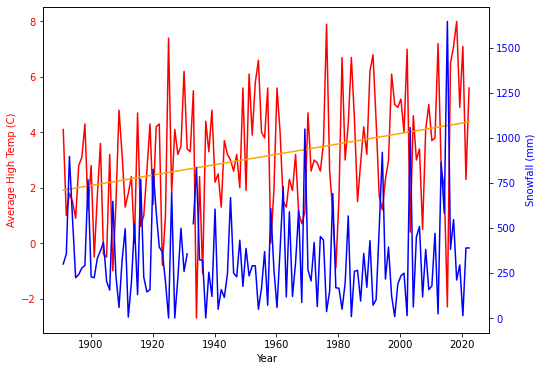

In [10]:
plot_double_scatter(boston_data.copy(), 'date', 'avgHighTemp', 'snowfall', \
    y_label1='Average High Temp (C)', y_label2='Snowfall (mm)', fit='first', \
        month_num=2)

Two more variables are graphed over time, average high temperature and average low temperature. Linear trendlines are included for both datasets.

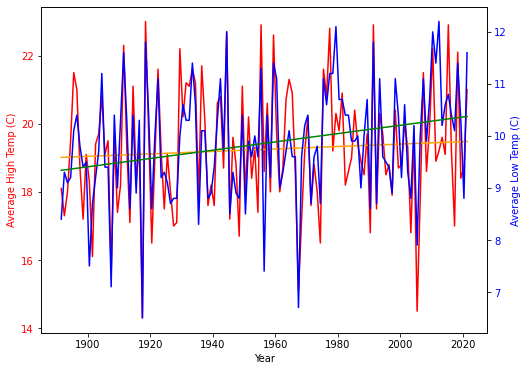

In [11]:
plot_double_scatter(boston_data.copy(), 'date', 'avgHighTemp', 'avgLowTemp', \
                    y_label1='Average High Temp (C)', \
                    y_label2='Average Low Temp (C)', fit='both', month_num=5)

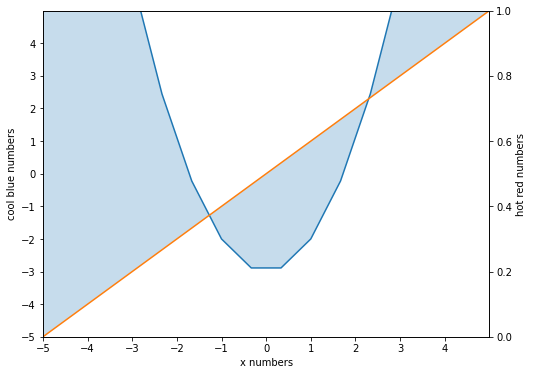

In [48]:
#testing in between visualization

#make data
x = np.linspace(-5, 5, 16)
y1 = x**2-3
y2 = x

#plot
fig, ax = plt.subplots()

#plot
ax.plot(x,y1)
ax.plot(x,y2)

#fill between
ax.fill_between(x, y1, y2, alpha=0.25, linewidth=1)

ax.set(xlim=(-5, 5), xticks=np.arange(-5, 5),
       ylim=(-5, 5), yticks=np.arange(-5, 5))

#axis labels
ax.set_xlabel("x numbers")
ax.set_ylabel("cool blue numbers")

#twin axes
ax2 = ax.twinx()
ax2.set_ylabel("hot red numbers")

plt.show()

<class 'pandas.core.frame.DataFrame'>
           string
             Date
0     1891.083333
1     1891.166667
2     1891.250000
3     1891.333333
4     1891.416667
...           ...
1569  2021.833333
1570  2021.916667
1571  2022.000000
1572  2022.083333
1573  2022.166667

[1574 rows x 1 columns]


ValueError: 'x' is not 1-dimensional

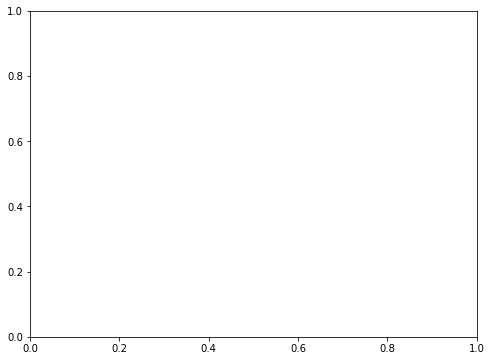

In [19]:
#in between visualization for boston data

fig, ax1 = plt.subplots()
print(type(boston_data["date"]))
print(boston_data["date"])
ax1.fill_between(boston_data["date"], boston_data["avgHighTemp"], boston_data["avgLowTemp"], alpha=.5, linewidth=0)

# Add axis label
ax1.set_xlabel("date")
ax1.set_ylabel("avgHighTemp")

#add twin axes
ax2 = ax1.twinx()
ax2.set_ylabel("avgLowTemp")

#show plot
plt.show()